# Network Based Modelling for Onchoceriasis

- Karan Ruparell
- January 2023

Communicating the probabilistic nature of the future to policy makers is hard.Often our goal is to highlight the importance of taking certain actions, while also highlighting that no single action comes with gurantees and there are always different possibilities for the same initial conditions.

We also note the need to incorporate socioeconomic data into our models for better understanding the effects of NTDs on different parts of the community, as well as the role that infection places on human factors.

To this end we propose a network based model that utilises simple friendship dynamics and social mobility, alongside other factors changing infection rate for individuals. This stochastic model allows users to run multiple siomulations to see how trajectories differ with the same input data, as well as how the trajectories tend to differ when we change different paramters such as temperature of social inequaity. 

In this report we walk through the implementation and suggest additions that can be made to the model.

To run all the code here you first need to install the packages that have been imported in the Appendix, and run the code there

# Stage 1: A simple model

The model below is made primarily to showcase the effects of social dynamics. The information it receives are:
1. N: The number of people in the population 
2. prob_inf: two numbers that show the probability of being infected in each time step if you are from social group A (more vulnerable) or social group B (less_vulnerable)
    - This can often coincide with 'lower socioeconomic status' and 'higher socioeconomic status'
3. prob_recovery: A probability of an ill
4. prob_friends: An initial probability of any two people being friends with eachother. In this model we assume this is identical for any two people
5. friends_change: 3 probabilities that show the base probability of a friendship being made between any two random people in the community, an increase to this probability based on how many mutual friends they have, and a probability of a friendship dying at each timestep
6. prob_vuln: 2 probabilities showing a base probability of being part of the less vulnerable class, and a number that increases this likelihood based on how many high vulnerability friends you have
7. Changeability: A number between 0 and 1 showing how much fluidity there is in vulnerability, where 0 means completely their vulnreability level is completely fixed and 1 means we disregard their vulnerability in the previous time stage entirely
8. T: How many time steps to run the model for




# Example Simulations

This code shows the impact of doubling the likelihood of any individual being low vulnerability and the impact of halving infection rate, for some given paramters. By changing the other paramters we can see how these effects differ in different base states. In the current model set up, we can see that doubling the amount of less vulnerable people has a noticeable effect on reducing overall infectiousness, but not as much as halving the infectiousness of the disease.

In [76]:
# Parameters: change to see new cases
N = 100
prob_friends = 0.2
T = 600
prob_inf = np.array([0.005,0.0005])
prob_recovery = 0.0025
friend_change = [0.0004,0.00045,0.015]
prob_vuln = np.array([0.1, 0.2]) 
changeability = 0.1


In [82]:
# Run to generate new simulations
Infected_Change = [0,1,2]
Infected_Change[0] = DiseaseSpread_Small(N,prob_friends,prob_inf,prob_recovery, friend_change, prob_vuln, changeability,T)
Infected_Change[1]= DiseaseSpread_Small(N,prob_friends,prob_inf,prob_recovery, friend_change, prob_vuln*2, changeability,T)
Infected_Change[2] = DiseaseSpread_Small(N,prob_friends,prob_inf/2,prob_recovery, friend_change, prob_vuln, changeability,T)


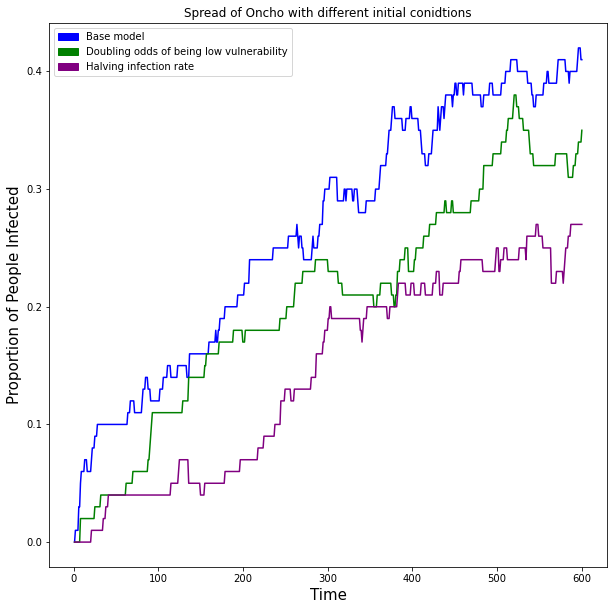

In [83]:
# Run to make the graphs
col = ['blue','green','purple']

blue_patch = mpatches.Patch(color='blue', label='Base model')
green_patch = mpatches.Patch(color='green', label='Doubling odds of being low vulnerability')
purple_patch = mpatches.Patch(color='purple', label='Halving infection rate') 

plt.figure(figsize = (10,10))

for k in range(0,3):
    plt.plot(np.linspace(1,T,T+1),np.transpose(Infected_Change[k]), c = col[k])


plt.rc('axes', labelsize=15) 
plt.rc('font', size = 10)
plt.xlabel("Time")
plt.ylabel("Proportion of People Infected")
plt.title("Spread of Oncho with different initial conidtions")
plt.legend(handles = [blue_patch,green_patch,purple_patch])

The above model has two vulnerability states, and allows us to move between them. It also assume a minimum level of susceptibility, independent of the indivudal.

A next step includes having unique susceptibility levels, potentially distributed under some model (gamma in EPIONCHO-IBM paper), with mean dependent on the demographics that the individual is part of.

This model needs an assumption that we already have information on the population beforehand, not just the size. This means a matrix of indivudals (rows) and demographic info (columns). Assume friendships unkown though.

Also need the parameters that explain the dependency of the model to the demographic data

# Stage 2: A more general model

The model above is insightful in provides some insight into the effects of social mobility, but does not allow us to directly incorporate new information we gather. 

Instead of accepting only two values of infection rate and a single indicator of vulnerable/not vulnerable, the more general model takes in a set of more general data tables


The data it takes in are:
1. Demographic Info: This is a table where the rows are individuals, and the columns are parameters that affect their vulnerability to Onchoceriasis. 
    - The first column is a 'dummy column', a with value 1 for each individual that we will use to incorporate a base probability of infection  
    - The first few columns are features that aren't changed by social dynamics but do effect the risk of infection to Oncho. This may be climactic features such as 'average temperature where this person is', indicator features of identity such as 'is a girl', or other features like the type of flies that are in the region the person is from. All categrical data will need to be given as a series of indicator columns
    - The last few columns are indicator features which are dependent on social dynamics: These can include 'need to go to water', 'occupation', 'socioeconomic status' etc.    
2. Num_unchangeable parameters: This tells the model how many of the columns aren't effected by social dynamics
3. Demographic_paramters: These are the coefficients attributed to the features, according to a Binomial Generalised Linear Model with a canonical link function as seen in "Model-Based Geostatistical Mapping of the Prevalence of Onchocerca volvulus in West Africa" by Hanlon et al. For the parameters effected by friends the coefficient corresponds to the impact of having an extra friend from that category 
4. prob_friends: An initial probability of any two people being friends with eachother. In this model we assume this is identical for any two people
5. friends_change: 3 probabilities that show the base probability of a friendship being made between any two random people in the community, an increase to this probability based on how many mutual friends they have, and a probability of a friendship dying at each timestep
6. changeability: A number between 0 and 1 showing how much fluidity there is in vulnerability, where 0 means completely their vulnreability level is completely fixed and 1 means we disregard their vulnerability in the previous time stage entirely
7. T: How many time steps to run the model for





# Stage 3: Additions

A number of additions that could be explored are:
 
1. Tuning paramters to fit with real life observations
2. Preparing the tables for the general mode, which could mean artificially generating realistic data on gender, occupation, distance to fast flowing water, or introducing columns with known values such as climactic features
3. Allow individuals to change features in the general model. While we have incorporates an increased risk of infection based on friends features, we have not incorporated a means by which people may change identity such as occupation
4. Incorporate the population size of vectors into the model\


# Appendix

In [2]:
# Packages needed
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import scipy.sparse as ss
import scipy.stats as st
import matplotlib.patches as mpatches
import itertools
import math

# Code for smaller model

In [3]:
# The canonical link function for a Binomial Generalised Linear Model
def Bin_Canon(x):
  return math.exp(x)/(1 + math.exp(x))

In [73]:
# infection change assuming constant # flies, worms, infection capabilities

def DiseaseSpread_Small(N,prob_friends,prob_inf,prob_recovery, friend_change, prob_vuln, changeability,T):
    G = nx.erdos_renyi_graph(N,prob_friends)
    Friend_Map = nx.to_numpy_array(G)
    vuln_level = st.bernoulli.rvs(prob_vuln[0], size=N)
    Infected = np.zeros(N)
    Infected_Dens = [np.sum(Infected) / N]
    
    [delta,epsilon,gamma] = friend_change
    Clique = nx.to_numpy_array(nx.complete_graph(N))
    for t in range (0,T):
        
        # New infections
        for i in range(len(Infected)):
            Infected[i] = st.bernoulli.rvs(prob_inf[vuln_level[i]])*(1-Infected[i])  + Infected[i]*st.bernoulli.rvs(1 -prob_recovery)  # so if you're infected you stay infected 
        
        # Changing Friends
        pd = (1-gamma)*Friend_Map + np.multiply((1-Friend_Map),(delta*Clique + epsilon*np.multiply(np.matmul(Friend_Map,Friend_Map),Clique)))
        new_Friend_Map = np.zeros((N,N))
        for i in range (0,N):
            for j in range (i,N):
                p = pd[i,j]
                if np.random.rand() < p:
                    new_Friend_Map[i,j] = 1
                    new_Friend_Map[j,i] = new_Friend_Map[i,j]
        Friend_Map = new_Friend_Map
        
        # New vuln level probabilities taking probabilities
        # Counts number of friends in a less vulnerable state (could be 'occupation', a factor of vulnerability dependent on friendship group)
        for i in range(N):
            friends_less_vuln = 0
            for j in range (N):
                friends_less_vuln += Friend_Map[i,j]*vuln_level[j]

                freq_prob = Bin_Canon(prob_vuln[1]*friends_less_vuln)
            indiv_prob_vuln = (1-changeability)*vuln_level[i] + changeability*(prob_vuln[0] + (1-prob_vuln[0])*freq_prob) # Weighted average for vulenrability
            vuln_level[i] = st.bernoulli.rvs(indiv_prob_vuln)
               
        # Recording infection density
        Infected_Dens = np.append(Infected_Dens,(np.sum(Infected) / N))      
            
    return [Infected_Dens]

# Code for larger model

In [79]:
# infection change accounting for multiple risk factors
# Chnagable paramters are 0/1/ number contributing to risk

def DiseaseSpread_Big(Demographic_Info,Num_unchangable_parameters, Demographic_parameters, prob_friends, friend_change, changeability,T):
    N = np.shape(Demographic_Info)[0]
    Num_parameters = np.shape(Demographic_Info)[1]
    G = nx.erdos_renyi_graph(N,prob_friends)
    Friend_Map = nx.to_numpy_array(G)
    Num_changeable_parameters = Num_parameters = Num_unchangable_parameters

    Infected = np.zeros(N)
    Infected_Dens = [np.sum(Infected) / N]
    
    unchanged_vuln_sum = list(range(Num_unchangable_parameters))
    # Individual unchanged contribution to probability of being infected
    for i in range(N):
      unchanged_vuln_sum[i] = np.sum(Demographic_parameters[0:Num_unchangable_parameters]*Demographic_Info[i,0:Num_unchangable_parameters])


    # Needed for the social interactions
    [delta,epsilon,gamma] = friend_change
    Clique = nx.to_numpy_array(nx.complete_graph(N))


    for t in range (0,T):    

        # New vuln level probabilities
        # Counts number of friends in a less vulnerable state (could be 'occupation', a factor of vulnerability dependent on friendship group)
        for i in range(N):
            friends_less_vuln = np.zeros(Num_changeable_parameters)
            for j in range (N):
              for k in range(Num_changeable_parameters):
                friends_less_vuln[k] += Friend_Map[i,j]*Demographic_Info[j,Num_changeable_parameters + k] 
            
            
            prob_vuln[i] = (1-changeability)*prob_vuln[i] + changeability*Bin_Canon(np.sum([unchanged_vuln_sum[i], friends_less_vuln[i]*Demographic_parameters[Num_unchangeable_parameters:N]]))
            
   
            # New infections
            Infected[i] = st.bernoulli.rvs(prob_inf[prob_vuln[i]])*(1-Infected[i])  + Infected[i]  # so if you're infected you stay infected 
        
        # Changing Friends
        pd = (1-gamma)*Friend_Map + np.multiply((1-Friend_Map),(delta*Clique + epsilon*np.multiply(np.matmul(Friend_Map,Friend_Map),Clique)))
        new_Friend_Map = np.zeros((N,N))
        for i in range (0,N):
            for j in range (i,N):
                p = pd[i,j]
                if np.random.rand() < p:
                    new_Friend_Map[i,j] = 1
                    new_Friend_Map[j,i] = new_Friend_Map[i,j]
        Friend_Map = new_Friend_Map
        
               
        # Recording infection density
        Infected_Dens = np.append(Infected_Dens,(np.sum(Infected) / N))      
            
    return [Infected_Dens]